<a href="https://colab.research.google.com/github/RuhmaAlavi/AICP-Internship-/blob/main/Week_6_AICP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Read CSV

In [3]:
import pandas as pd

# Read the CSV file
data = pd.read_csv("/content/births.csv")
data

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


###Q.1: Add a new column “Decade” by calculating. For example 1969 will be 1960, 1988 will 1980 etc.

In [6]:
# Assuming your DataFrame is named 'data' and contains a column 'BirthYear'
data['Decade'] = (data['year'] // 10) * 10
data


,year,month,day,gender,births,Decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960
...,...,...,...,...,...,...
15542,2008,10,NaN,M,183219,2000
15543,2008,11,NaN,F,158939,2000
15544,2008,11,NaN,M,165468,2000
15545,2008,12,NaN,F,173215,2000


### Q.2: Show the descriptive statistics of the data.

In [7]:
print(data.describe())

               year         month           day         births        Decade
count  15547.000000  15547.000000  15067.000000   15547.000000  15547.000000
mean    1979.037435      6.515919     17.769894    9762.293561   1974.544285
std        6.728340      3.449632     15.284034   28552.465810      6.789583
min     1969.000000      1.000000      1.000000       1.000000   1960.000000
25%     1974.000000      4.000000      8.000000    4358.000000   1970.000000
50%     1979.000000      7.000000     16.000000    4814.000000   1970.000000
75%     1984.000000     10.000000     24.000000    5289.500000   1980.000000
max     2008.000000     12.000000     99.000000  199622.000000   2000.000000


### Q.3: Check if your data contains any missing values

In [8]:
print(data.isnull().sum())


year        0
month       0
day       480
gender      0
births      0
Decade      0
dtype: int64


### Q.4: What is the trend of male & female births every decade?

In [13]:
trend_per_decade = data.groupby(['Decade', 'gender'])['births'].sum().reset_index()
trend_per_decade

,Decade,gender,births
0,1960,F,1753634
1,1960,M,1846572
2,1970,F,16263075
3,1970,M,17121550
4,1980,F,18310351
5,1980,M,19243452
6,1990,F,19479454
7,1990,M,20420553
8,2000,F,18229309
9,2000,M,19106428


### To remove outliers from the dataset using 5 standard deviations from the mean

In [16]:
mean = data['births'].mean()
std_dev = data['births'].std()
data = data[(data['births'] >= mean - 5 * std_dev) & (data['births'] <= mean + 5 * std_dev)]
mean
std_dev
data

,year,month,day,gender,births,Decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960
...,...,...,...,...,...,...
15062,1988,12,29.0,M,5944,1980
15063,1988,12,30.0,F,5742,1980
15064,1988,12,30.0,M,6095,1980
15065,1988,12,31.0,F,4435,1980


###Plot births by weekday for several decades:

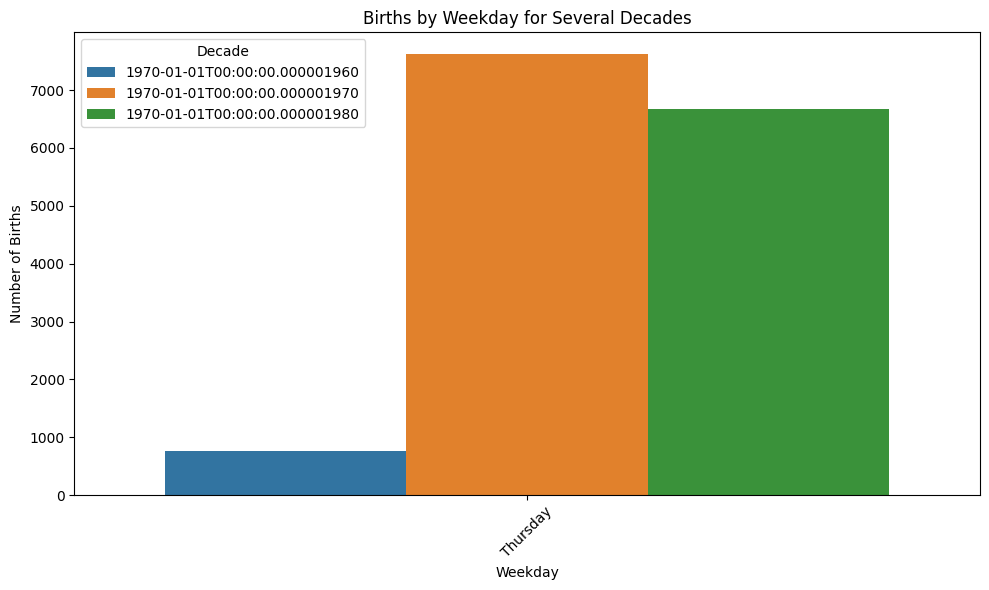

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Remove outliers using the 5 standard deviations technique
mean = data['births'].mean()
std_dev = data['births'].std()
data = data[(data['births'] >= mean - 5 * std_dev) & (data['births'] <= mean + 5 * std_dev)]

# Convert 'Date' column to datetime and add 'Weekday' column
data['Decade'] = pd.to_datetime(data['Decade'])
data['Weekday'] = data['Decade'].dt.strftime('%A')

# Plot births by weekday for several decades
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Weekday', hue='Decade')
plt.title('Births by Weekday for Several Decades')
plt.xlabel('Weekday')
plt.ylabel('Number of Births')
plt.xticks(rotation=45)
plt.legend(title='Decade')
plt.tight_layout()
plt.show()


###Group the data by month and day separately:

In [22]:
grouped_by_month = data.groupby('month')['births'].sum().reset_index()
grouped_by_day = data.groupby('day')['births'].sum().reset_index()
grouped_by_day
grouped_by_month

,month,births
0,1,5759568
1,2,5363417
2,3,5868651
3,4,5561317
4,5,5785602
5,6,5759233
6,7,6220777
7,8,6310276
8,9,6206785
9,10,6056193


### Plotting the time series reflecting the average number of births by date of the year:

In [26]:
average_births_by_date = data.groupby(['month', 'day'])['births'].mean().reset_index()
fig = px.line(average_births_by_date, x='day', y='births', title='Average Births by Date of the Year')
fig.show()